In `normalise_and_chunk_energy_data.ipynb` we wrote some code to convert hourly timestamped numerical data into a text file where each row is a day with a character sequence of 24 characters, with a character from 0 to 20 representing the numerical value. Now, we want to use this to construct a simple bigram model, that simply predicts the next character in sequence based on this data. This is based on karpathy's makemore lecture series. In this we are going to recreate his first lecture, makemore part 1, which constructs a neural net that is tuned to produce the same results as a simple first order markov chain model. 

In [3]:
# first we load the data
sequences = open('/Users/eoghan/repos/makemore/data/data.txt', 'r').read().splitlines()
sequences[:10]

['<M> <M> <M> <M> <M> <M> <M> <M> <M> <M> 1.0 2.0 4.0 4.0 4.0 1.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 2.0 3.0 1.0 1.0 1.0 1.0 1.0 2.0 7.0 4.0 4.0 2.0 1.0 2.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 2.0 1.0 3.0 6.0 1.0 1.0 1.0 1.0 1.0 1.0 4.0 8.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 3.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 4.0 1.0 7.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0',
 '1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0']

In [4]:
len(sequences)

674

In [5]:
min(len(s) for s in sequences), max(len(s) for s in sequences)

(95, 97)

In [7]:
sequences[0].split(' ')

['<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '1.0',
 '2.0',
 '4.0',
 '4.0',
 '4.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0']

In [8]:
b = {}
for s in sequences:
    chs = ['<S>'] + s.split(' ') + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('1.0', '1.0'), 7559),
 (('2.0', '1.0'), 931),
 (('1.0', '2.0'), 901),
 (('0.0', '0.0'), 896),
 (('<S>', '1.0'), 540),
 (('1.0', '<E>'), 536),
 (('<M>', '<M>'), 478),
 (('2.0', '2.0'), 429),
 (('1.0', '0.0'), 313),
 (('0.0', '1.0'), 283),
 (('1.0', '3.0'), 267),
 (('3.0', '1.0'), 220),
 (('3.0', '2.0'), 215),
 (('2.0', '3.0'), 160),
 (('1.0', '4.0'), 157),
 (('2.0', '4.0'), 148),
 (('5.0', '1.0'), 136),
 (('4.0', '1.0'), 135),
 (('3.0', '3.0'), 124),
 (('4.0', '2.0'), 122),
 (('2.0', '5.0'), 110),
 (('<M>', '1.0'), 96),
 (('3.0', '4.0'), 93),
 (('4.0', '3.0'), 84),
 (('4.0', '5.0'), 81),
 (('1.0', '<M>'), 81),
 (('4.0', '4.0'), 77),
 (('5.0', '2.0'), 74),
 (('<S>', '0.0'), 71),
 (('0.0', '2.0'), 64),
 (('3.0', '5.0'), 62),
 (('6.0', '2.0'), 59),
 (('1.0', '5.0'), 58),
 (('5.0', '3.0'), 57),
 (('0.0', '<E>'), 42),
 (('2.0', '6.0'), 42),
 (('3.0', '6.0'), 40),
 (('6.0', '1.0'), 38),
 (('0.0', '<M>'), 38),
 (('<M>', '0.0'), 38),
 (('1.0', '6.0'), 34),
 (('5.0', '4.0'), 32),
 (('5.0', '5

In [10]:
import torch

In [42]:
N = torch.zeros((24, 24), dtype=torch.int32)

what we want to do now is create a string to index map. so for that we want to have a set of all the possible instances.

In [30]:
uniques = []
uniques.append('<M>')
uniques.append('<S>')
# Define your order
order = ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0']
for i in order:
    uniques.append(i)
uniques.append('<E>')
uniques

['<M>',
 '<S>',
 '0.0',
 '1.0',
 '2.0',
 '3.0',
 '4.0',
 '5.0',
 '6.0',
 '7.0',
 '8.0',
 '9.0',
 '10.0',
 '11.0',
 '12.0',
 '13.0',
 '14.0',
 '15.0',
 '16.0',
 '17.0',
 '18.0',
 '19.0',
 '20.0',
 '<E>']

In [39]:
stoi = {s:i for i,s in enumerate(uniques)}
itos = {i:s for s,i in stoi.items()}

In [40]:
stoi

{'<M>': 0,
 '<S>': 1,
 '0.0': 2,
 '1.0': 3,
 '2.0': 4,
 '3.0': 5,
 '4.0': 6,
 '5.0': 7,
 '6.0': 8,
 '7.0': 9,
 '8.0': 10,
 '9.0': 11,
 '10.0': 12,
 '11.0': 13,
 '12.0': 14,
 '13.0': 15,
 '14.0': 16,
 '15.0': 17,
 '16.0': 18,
 '17.0': 19,
 '18.0': 20,
 '19.0': 21,
 '20.0': 22,
 '<E>': 23}

In [35]:
sequences[0].split(' ')

['<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '<M>',
 '1.0',
 '2.0',
 '4.0',
 '4.0',
 '4.0',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '2.0',
 '1.0',
 '1.0']

In [43]:
for s in sequences:
  chs = ['<S>'] + s.split(' ') + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

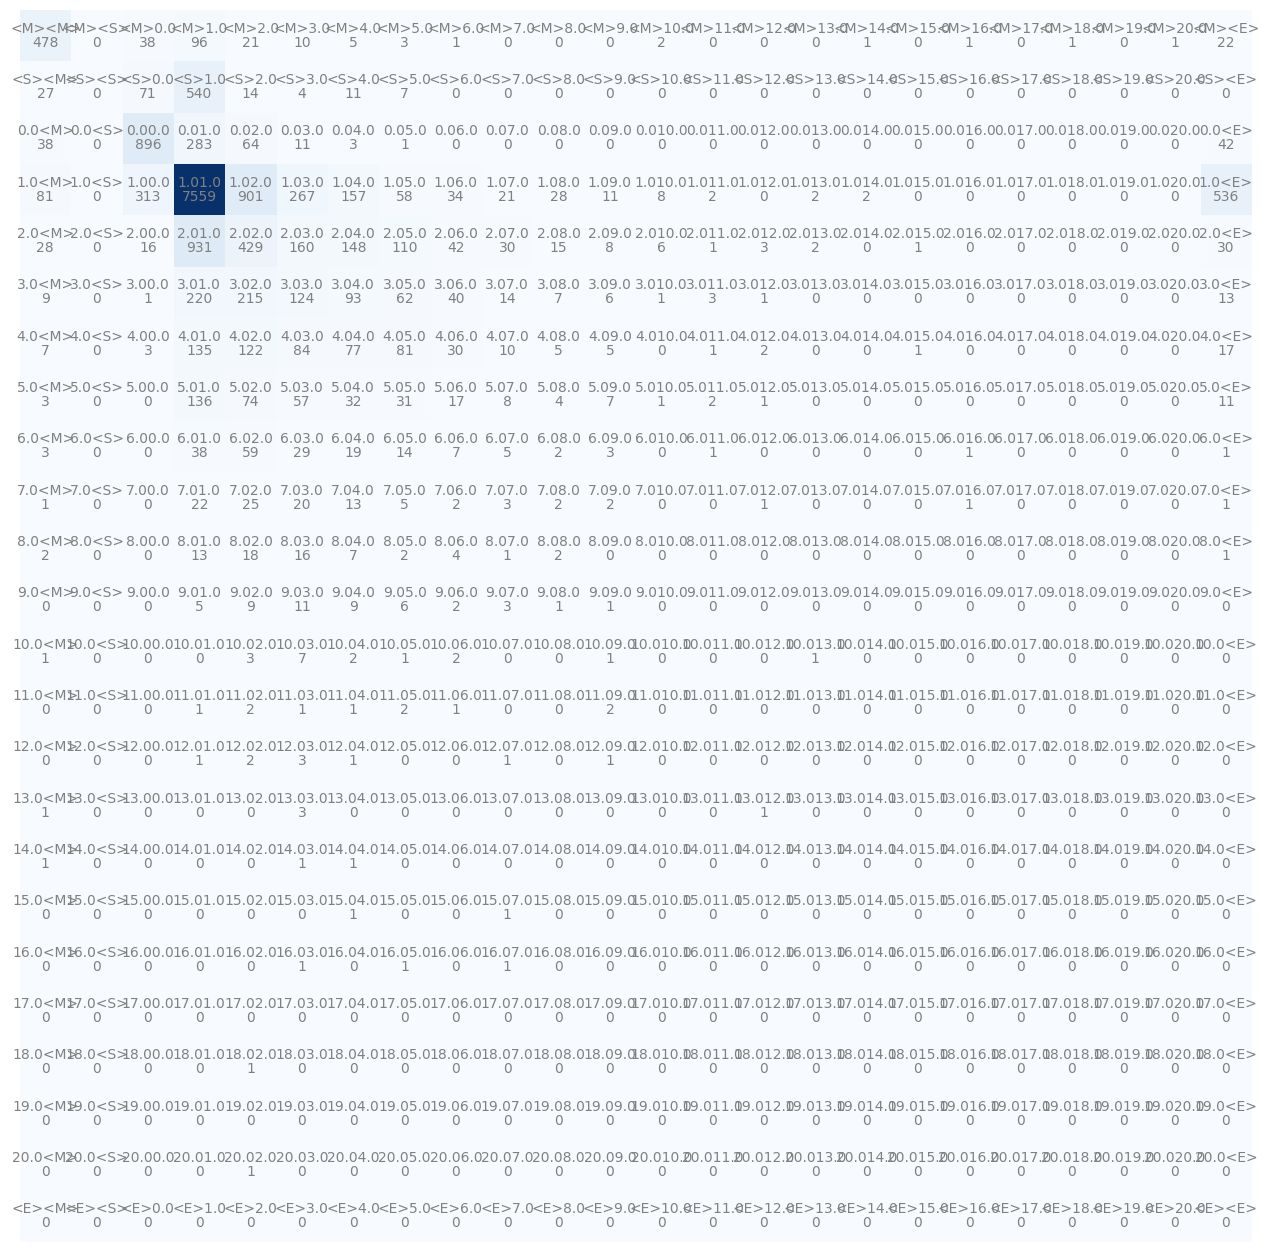

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(24):
    for j in range(24):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [48]:
N[0]

tensor([478,   0,  38,  96,  21,  10,   5,   3,   1,   0,   0,   0,   2,   0,
          0,   0,   1,   0,   1,   0,   1,   0,   1,  22], dtype=torch.int32)

In [50]:
p = N[1].float()
p = p / p.sum()
p

tensor([0.0401, 0.0000, 0.1053, 0.8012, 0.0208, 0.0059, 0.0163, 0.0104, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [51]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'1.0'

In [60]:
P = (N+1).float()


In [54]:
P.sum(1, keepdims=True).shape

torch.Size([24, 1])

In [55]:
P.shape

torch.Size([24, 24])

In [61]:
P /= P.sum(1, keepdims=True)

In [65]:
P[1]

tensor([0.0401, 0.0014, 0.1032, 0.7751, 0.0215, 0.0072, 0.0172, 0.0115, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014])

In [81]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 1
  for t in range(23):
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 23:
      break
  print(' '.join(out))

1.0 1.0 1.0 4.0 9.0 4.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 4.0 4.0 3.0 1.0 1.0 1.0 1.0 3.0 2.0 3.0
1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 <M> 0.0 <M> <M> 1.0
1.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 <E>
1.0 1.0 1.0 <E>
0.0 0.0 2.0 4.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 1.0 1.0 1.0 1.0 <E>


Right, so we've created a very simple sequence generator, this makes sequences that are based on simply just predicting the next in sequence based on the previous one. So it's idenitical to a first order markov chain. 

And next up, the task is to train a simple single layered neural network which will produce outputs that are going to be equivalent to the *rows* of the N / P table, i.e. the probability distribution of what is the next character in a sequence given a previous one.

In [82]:
# so let's start by calculating the log likelihood of the existing data set.
log_likelihood = 0
n = 0
for s in sequences:
  chs = ['<S>'] + s.split(' ') + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    log_likelihood += torch.log(P[ix1, ix2])
    n += 1
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-20223.2949)
nll=tensor(20223.2949)
nll/n=tensor(1.2002)


In [109]:
# create the training set of bigrams
xs = []
ys = []

for s in sequences[:1]:
    chs = ['<S>'] + s.split(' ') + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])

xs = torch.tensor(xs)
ys = torch.tensor(ys)


<S> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> <M>
<M> 1.0
1.0 2.0
2.0 4.0
4.0 4.0
4.0 4.0
4.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 2.0
2.0 1.0
1.0 2.0
2.0 1.0
1.0 1.0
1.0 <E>


In [84]:
xs, ys

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 6, 6, 3, 3, 3, 3, 4, 3, 4, 3, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 6, 6, 3, 3, 3, 3, 4, 3, 4, 3, 3, 23])

So these xs, and ys, are the *indices* that correspond to the characters. And now we want to one hot encode them, this means that each index is represented by a vector with a 1 at the position for the index, and zeros elsewhere. These then can be used as the inputs to the neural network. 

In [85]:
import torch.nn.functional as F
xenc = F.one_hot(torch.tensor(xs), num_classes=24).float()
xenc

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [86]:
xenc.shape

torch.Size([25, 24])

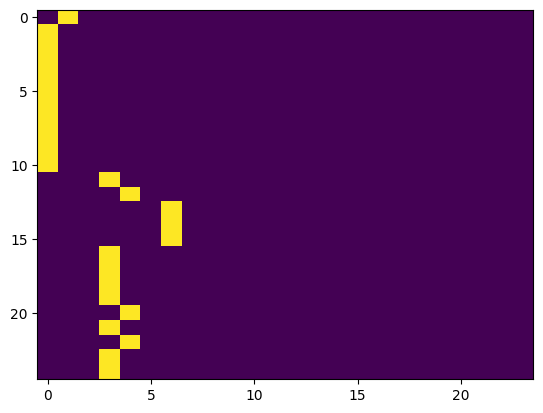

In [87]:
plt.imshow(xenc, aspect='auto')

In [88]:
xenc.dtype

torch.float32

In [98]:
# so these are esssentially the inputs to the neural network, for the first sequence, there are many more sequences, this is just one for traiing.
# and so we can construct a set of weights that are applied to this input, the dot product, so the sum of the pairwise products of the weights and the inputs
# so remember the shape of the array of indices is 24, there are 24 possible indexes. so the weights can be simply 24 times the number of neurons in the hidden layer, 
# and here we will use a hidden layer consisting of one neuron for each possible index, so 24 neurons in the hidden layer.
W = torch.randn((24, 24))


In [99]:
W.shape, xenc.shape

(torch.Size([24, 24]), torch.Size([25, 24]))

In [100]:
(xenc @ W).shape


torch.Size([25, 24])

And the result here are the activations of the hidden layer neuron, for the sequence of training data (in this case 25 examples). And in this simple example, we will take these to be logits i.e. log counts.

In [101]:
logits = xenc @ W
logits


tensor([[ 0.6988, -0.2725,  0.5162, -1.2240, -0.7582, -1.1100, -1.8052, -1.5302,
         -1.6245, -1.0988,  1.4065,  3.1248,  0.2156, -0.1177, -0.7147, -1.4345,
          0.1430,  0.0506, -2.3487, -1.0724, -1.2787,  0.2384,  1.3620,  0.7335],
        [-1.0169, -0.8640, -0.9419, -0.2242, -0.4286, -0.3846, -0.9545,  0.0888,
          1.7348,  1.1929,  0.5484, -0.4831,  0.5096, -1.1679,  1.6329,  0.5580,
         -0.2019,  1.3570,  2.1200, -1.1515,  0.8723, -1.6930,  0.5852,  0.6817],
        [-1.0169, -0.8640, -0.9419, -0.2242, -0.4286, -0.3846, -0.9545,  0.0888,
          1.7348,  1.1929,  0.5484, -0.4831,  0.5096, -1.1679,  1.6329,  0.5580,
         -0.2019,  1.3570,  2.1200, -1.1515,  0.8723, -1.6930,  0.5852,  0.6817],
        [-1.0169, -0.8640, -0.9419, -0.2242, -0.4286, -0.3846, -0.9545,  0.0888,
          1.7348,  1.1929,  0.5484, -0.4831,  0.5096, -1.1679,  1.6329,  0.5580,
         -0.2019,  1.3570,  2.1200, -1.1515,  0.8723, -1.6930,  0.5852,  0.6817],
        [-1.0169, -0.864

In [102]:
counts = logits.exp()
counts


tensor([[ 2.0114,  0.7615,  1.6757,  0.2940,  0.4685,  0.3295,  0.1644,  0.2165,
          0.1970,  0.3333,  4.0815, 22.7556,  1.2407,  0.8890,  0.4893,  0.2382,
          1.1537,  1.0519,  0.0955,  0.3422,  0.2784,  1.2692,  3.9040,  2.0823],
        [ 0.3617,  0.4215,  0.3899,  0.7991,  0.6514,  0.6808,  0.3850,  1.0929,
          5.6679,  3.2965,  1.7306,  0.6169,  1.6646,  0.3110,  5.1188,  1.7473,
          0.8172,  3.8846,  8.3307,  0.3162,  2.3925,  0.1840,  1.7954,  1.9773],
        [ 0.3617,  0.4215,  0.3899,  0.7991,  0.6514,  0.6808,  0.3850,  1.0929,
          5.6679,  3.2965,  1.7306,  0.6169,  1.6646,  0.3110,  5.1188,  1.7473,
          0.8172,  3.8846,  8.3307,  0.3162,  2.3925,  0.1840,  1.7954,  1.9773],
        [ 0.3617,  0.4215,  0.3899,  0.7991,  0.6514,  0.6808,  0.3850,  1.0929,
          5.6679,  3.2965,  1.7306,  0.6169,  1.6646,  0.3110,  5.1188,  1.7473,
          0.8172,  3.8846,  8.3307,  0.3162,  2.3925,  0.1840,  1.7954,  1.9773],
        [ 0.3617,  0.421

So these outputs now are equivalent to the counts that appeared in the N matrix. And we want to convert these into probabilties, as before

In [103]:
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0434, 0.0164, 0.0362, 0.0063, 0.0101, 0.0071, 0.0035, 0.0047, 0.0043,
         0.0072, 0.0881, 0.4912, 0.0268, 0.0192, 0.0106, 0.0051, 0.0249, 0.0227,
         0.0021, 0.0074, 0.0060, 0.0274, 0.0843, 0.0450],
        [0.0081, 0.0094, 0.0087, 0.0179, 0.0146, 0.0153, 0.0086, 0.0245, 0.1270,
         0.0739, 0.0388, 0.0138, 0.0373, 0.0070, 0.1147, 0.0391, 0.0183, 0.0870,
         0.1866, 0.0071, 0.0536, 0.0041, 0.0402, 0.0443],
        [0.0081, 0.0094, 0.0087, 0.0179, 0.0146, 0.0153, 0.0086, 0.0245, 0.1270,
         0.0739, 0.0388, 0.0138, 0.0373, 0.0070, 0.1147, 0.0391, 0.0183, 0.0870,
         0.1866, 0.0071, 0.0536, 0.0041, 0.0402, 0.0443],
        [0.0081, 0.0094, 0.0087, 0.0179, 0.0146, 0.0153, 0.0086, 0.0245, 0.1270,
         0.0739, 0.0388, 0.0138, 0.0373, 0.0070, 0.1147, 0.0391, 0.0183, 0.0870,
         0.1866, 0.0071, 0.0536, 0.0041, 0.0402, 0.0443],
        [0.0081, 0.0094, 0.0087, 0.0179, 0.0146, 0.0153, 0.0086, 0.0245, 0.1270,
         0.0739, 0.0388, 0.0138, 0.0373

In [104]:
# let's check these sum to 1
probs.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [105]:
# remember what xs and ys are, these are the training data.
xs, ys

([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 6, 6, 3, 3, 3, 3, 4, 3, 4, 3, 3],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 6, 6, 3, 3, 3, 3, 4, 3, 4, 3, 3, 23])

In [106]:
# great. now let's initialise the weights given a random seed
# randomly initialize 24 neurons' weights. each neuron receives 24 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((24, 24), generator=g)

In [107]:
# do a forward pass
xenc = F.one_hot(torch.tensor(xs), num_classes=24).float()
logits = xenc @ W #<--- this produces the activation for the 24 neurons, for each of the training examples, we take this to be log(counts)
counts = logits.exp()  #<--- this is the equivalent of the counts  
probs = counts / counts.sum(1, keepdim=True) #<--- this is the equivalent of the probabilities
probs.shape

torch.Size([25, 24])

In [112]:
# now let's itereate over the training data set and calculate the negative log likelihood, which we don't expect will be very good
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: <S><M> (indexes 1,0)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0179, 0.2329, 0.2211, 0.0098, 0.0057, 0.0260, 0.0066, 0.0397, 0.0202,
        0.0710, 0.0086, 0.0082, 0.0031, 0.0671, 0.0056, 0.0647, 0.0073, 0.0152,
        0.0135, 0.0267, 0.0051, 0.0589, 0.0348, 0.0303])
label (actual next character): 0
probability assigned by the net to the the correct character: 0.017865968868136406
log likelihood: -4.024857521057129
negative log likelihood: 4.024857521057129
--------
bigram example 2: <M><M> (indexes 0,0)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0881, 0.0145, 0.0179, 0.0061, 0.0245, 0.0178, 0.0039, 0.0337, 0.0199,
        0.0454, 0.0115, 0.0404, 0.0132, 0.0119, 0.0725, 0.3453, 0.0876, 0.0036,
        0.0362, 0.0079, 0.0492, 0.0158, 0.0042, 0.0288])
label (actual next character): 0
probability assigned by the net to the the correct character: 0.088106669485569
log likelihood: -2.429207

Okay, so we can see that this is aa higher average loss, than the one we calculated for the N matrix. So clearly, this means the probabilities assigned to the sequences we see in th training data were not given probablities as high as those we saw in the actual data, which means the neural net is not optimaised, i.e. it's would not be likely to create sequences like those found in the training data, and so the net needs to be optimised, to be tuned, so that it has probabilities that are similar, or the same as those found in the training data set. 